# LOADING  LIBRARIES

LINK TO DEPLOYED VERSION (GITHUB):
API SWGGER DOCUMENTATION (ML API):

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import re
import unicodedata
from bs4 import BeautifulSoup
import joblib
import os
%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
df=pd.read_csv("./dataset.csv")

In [ ]:
df.head(10)

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運...,Japanese
6,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish
7,müller mox figura centralis circulorum doctoru...,Latin
8,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に...,Japanese


In [ ]:
df.shape

(34016, 2)

# DATA CLEANING

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

2494

In [8]:
df = df.drop_duplicates(subset='Text')
df = df.dropna(subset='Text')
df = df.reset_index(drop=True)
counts = df["language"].value_counts()
print(counts)

language
French        10439
Turkish        1000
English        1000
Romanian       1000
Estonian        998
Portugese       997
Spanish         996
Dutch           995
Swedish         990
Indonesian      974
Latin           953
Japanese        454
Chinese         389
Thai            359
Pushto          310
Tamil           274
Korean          252
Urdu            243
Hindi           218
 French         204
Persian         168
Arabic          162
Russian         148
Name: count, dtype: int64


In [ ]:
def clean_text(text):

    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # # Remove stopwords
    # stop_words = set(stopwords.words('english'))
    # words = text.split()
    # filtered_words = [word for word in words if word.lower() not in stop_words]
    # text = ' '.join(filtered_words)

    return text

df["Text"] = df["Text"].apply(clean_text)
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish
2,thanon charoen krung,Thai
3,,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


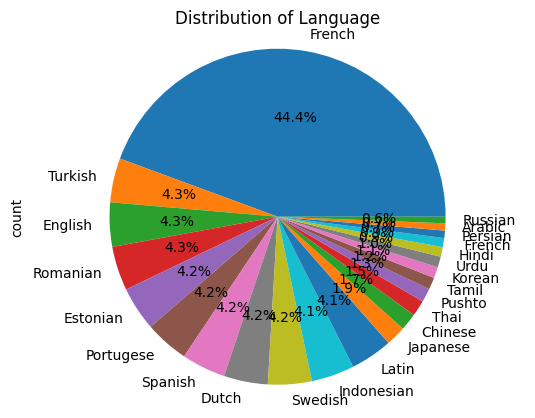

C:\Users\OLUWADAMMY\AppData\Local\Temp\ipykernel_8792\2689085613.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="language", data=df, palette="tab10")


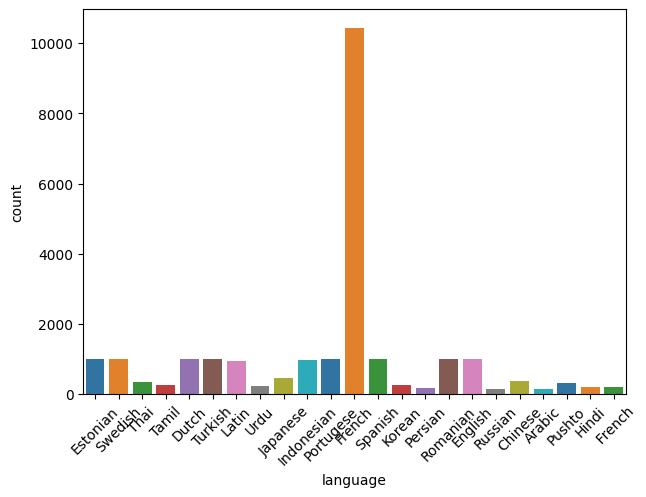

In [9]:


counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Language')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x="language", data=df, palette="tab10")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 90 degrees
plt.show()




In [10]:
def word_cloud(language, color):
    
    text_df = df[df['language'] == f'{language}']
    stopwords = set(STOPWORDS)
    text2 = "  ".join(review for review in text_df['Text'])  
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color=f"{color}", stopwords=stopwords).generate(text2)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

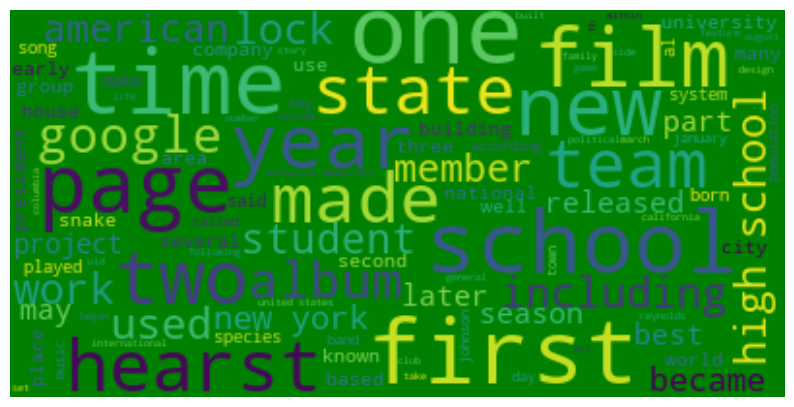

In [11]:

word_cloud(language="English", color="green")


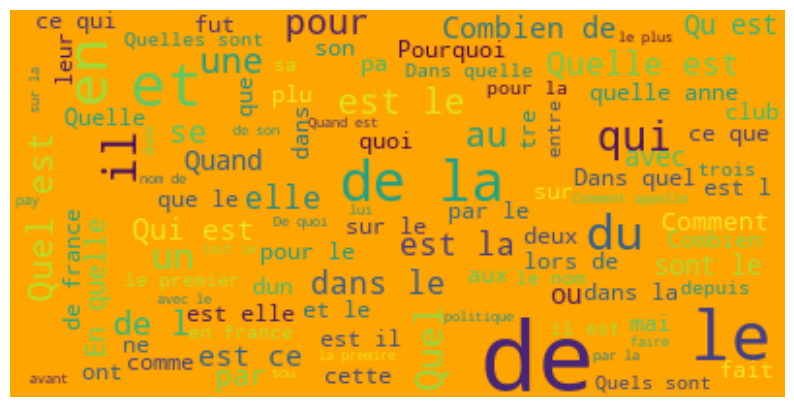

In [12]:

word_cloud(language="French", color="orange")



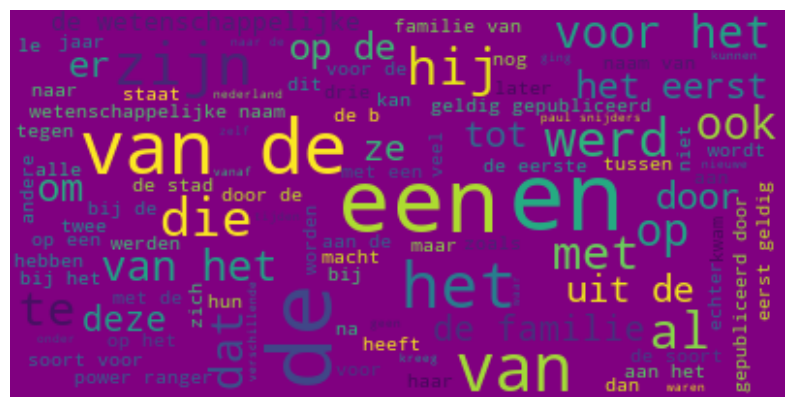

In [13]:

word_cloud(language="Dutch", color="purple")



In [14]:
# Label Encoding: Convert the "language" feature using label encoding. Assign unique integer labels to each language since most machine learning models require numerical input. Categorical data, such as text labels or non-numeric features, need to be converted into numbers to be used effectively by these models.
from sklearn.preprocessing import LabelEncoder
label_encoder  = LabelEncoder()
df["Encoded language"]=label_encoder.fit_transform(df["language"])
df

,Text,language,Encoded language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,5
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish,18
2,thanon charoen krung,Thai,20
3,,Tamil,19
4,de spons behoort tot het geslacht haliclona en...,Dutch,3
...,...,...,...
23518,Quelle cause il dfendu,French,6
23519,Dans quelle ville se trouve lglise Proust baptis,French,6
23520,Les attaques antismites provenaient de quelles...,French,6
23521,Quels types dattaques il subi,French,6


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
tf= TfidfVectorizer()

X=df["Text"]
Y=df["language"]

train_data=tf.fit_transform(X)
print(train_data)

  (0, 46030)	0.15251890282788902
  (0, 127718)	0.15251890282788902
  (0, 79973)	0.13904578493353129
  (0, 48224)	0.15251890282788902
  (0, 118506)	0.13904578493353129
  (0, 46024)	0.15251890282788902
  (0, 78660)	0.22960789267291346
  (0, 164)	0.21621328922999342
  (0, 58297)	0.2681966097752946
  (0, 66746)	0.2421028381405306
  (0, 127717)	0.15251890282788902
  (0, 62485)	0.15251890282788902
  (0, 6615)	0.11043316675673821
  (0, 71021)	0.15251890282788902
  (0, 111267)	0.08333646257883301
  (0, 123063)	0.1340983048876473
  (0, 147)	0.08555880151655977
  (0, 117580)	0.15251890282788902
  (0, 63957)	0.1465569531829153
  (0, 51930)	0.15251890282788902
  (0, 47709)	0.12289181505200626
  (0, 84200)	0.15251890282788902
  (0, 83048)	0.15251890282788902
  (0, 56049)	0.13129317376851388
  (0, 49518)	0.1465569531829153
  :	:
  (23519, 123212)	0.31372730546168687
  (23519, 93835)	0.18620268778124363
  (23519, 117158)	0.3247821253203834
  (23519, 102496)	0.18490346521350887
  (23519, 26173)	0.2082

In [17]:
from sklearn.model_selection import train_test_split

# Using 20% of my data for the test, and using 80% for training, https://youtu.be/NQifPki6tGE?si=6VVhTbTb5NErGevJ


X_train,X_test,Y_train,Y_test=train_test_split(train_data,Y,test_size=0.2,random_state=42)



In [18]:
type(Y_test)

pandas.core.series.Series

In [19]:
svm= SVC()  
svm.fit(X_train, Y_train)


SVC()

In [20]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.35%


![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

In [21]:
# Train the SVM model only if the trained model is not already saved
if not os.path.exists("svm_model.pkl"):
    joblib.dump(svm, "svm_model.pkl")
else:
    # Load the trained model from disk
    svm = joblib.load("svm_model.pkl")

c:\Python312\Lib\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator SVC from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Confusion matrix

In [22]:
enccoded_languages = sorted(df["Encoded language"].unique()) 
unique_languages = sorted(df["language"].unique())
df

,Text,language,Encoded language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,5
1,sebes joseph pereira thomas pa eng jesuits sin...,Swedish,18
2,thanon charoen krung,Thai,20
3,,Tamil,19
4,de spons behoort tot het geslacht haliclona en...,Dutch,3
...,...,...,...
23518,Quelle cause il dfendu,French,6
23519,Dans quelle ville se trouve lglise Proust baptis,French,6
23520,Les attaques antismites provenaient de quelles...,French,6
23521,Quels types dattaques il subi,French,6


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[' French', 'Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']


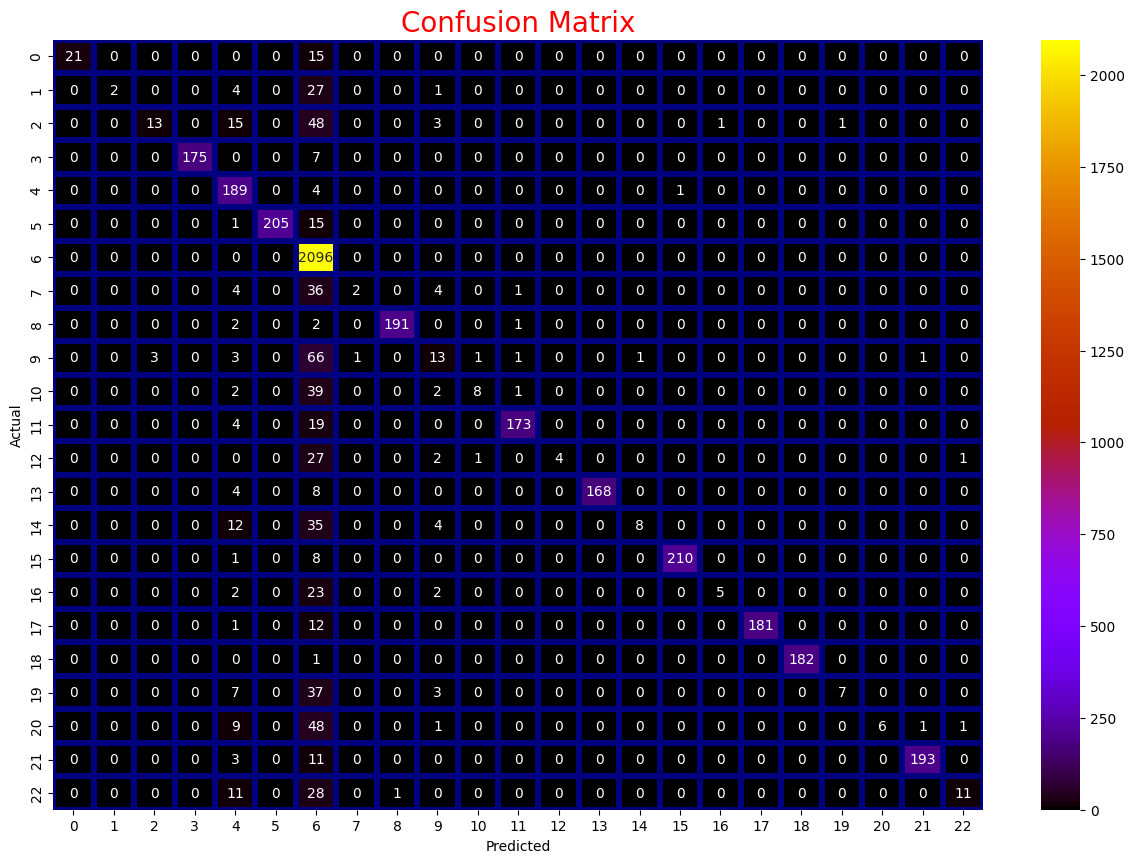

In [23]:
print(enccoded_languages)
print(unique_languages)
cf=confusion_matrix(Y_test,y_pred)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gnuplot",
           linewidths=3, linecolor='navy')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report

In [24]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

      French       1.00      0.58      0.74        36
      Arabic       1.00      0.06      0.11        34
     Chinese       0.81      0.16      0.27        81
       Dutch       1.00      0.96      0.98       182
     English       0.69      0.97      0.81       194
    Estonian       1.00      0.93      0.96       221
      French       0.80      1.00      0.89      2096
       Hindi       0.67      0.04      0.08        47
  Indonesian       0.99      0.97      0.98       196
    Japanese       0.37      0.14      0.21        90
      Korean       0.80      0.15      0.26        52
       Latin       0.98      0.88      0.93       196
     Persian       1.00      0.11      0.21        35
   Portugese       1.00      0.93      0.97       180
      Pushto       0.89      0.14      0.24        59
    Romanian       1.00      0.96      0.98       219
     Russian       0.83      0.16      0.26        32
     Spanish       1.00    

# Roc Auc

In [25]:
# from yellowbrick.classifier import ROCAUC

# model = SVC()
# visualizer = ROCAUC(model, classes=label_name)

# visualizer.fit(X_train, Y_train)
# visualizer.score(X_test, Y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()


# Naive Bayes

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
nb= MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB()

In [28]:
pred1=nb.predict(X_test)
accuracy1 = accuracy_score(Y_test,pred1)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 80.23%


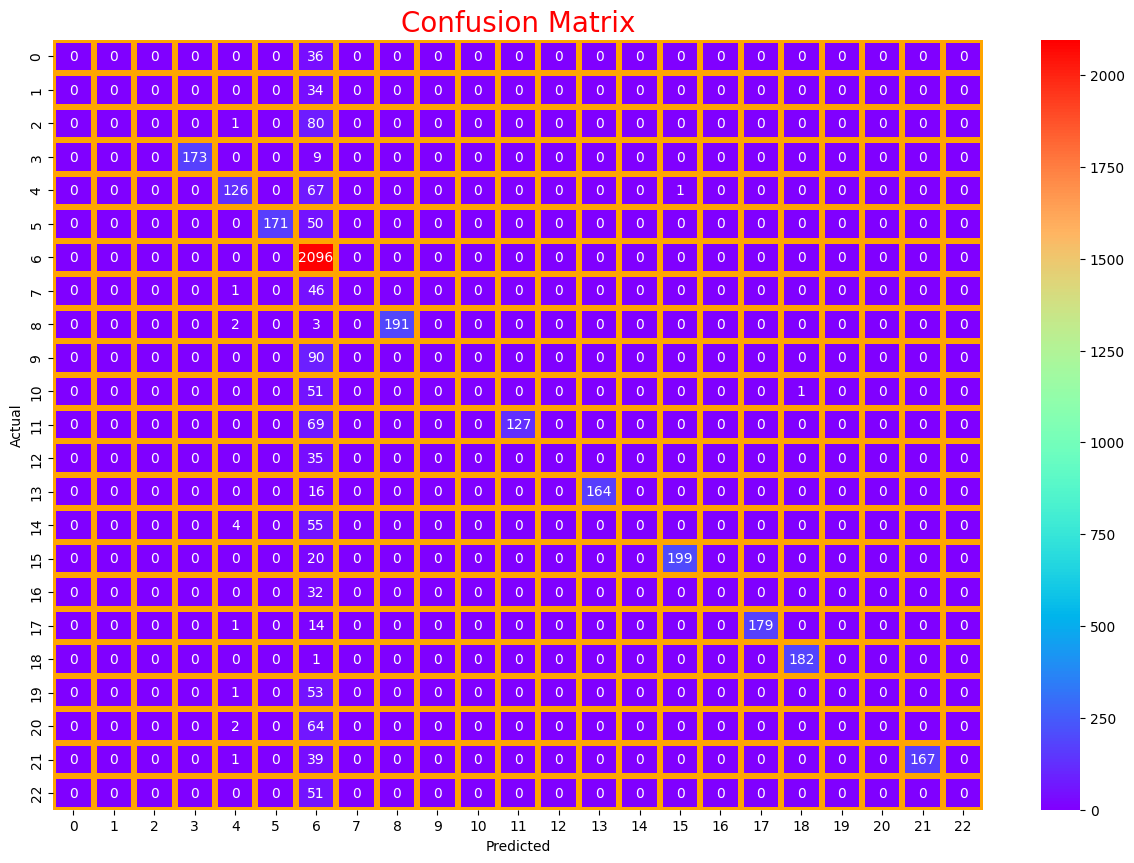

In [29]:
cf0=confusion_matrix(Y_test,pred1)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf0,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="rainbow",
           linewidths=3, linecolor='orange')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
print(classification_report(Y_test,pred1))

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      French       0.00      0.00      0.00        36
      Arabic       0.00      0.00      0.00        34
     Chinese       0.00      0.00      0.00        81
       Dutch       1.00      0.95      0.97       182
     English       0.91      0.65      0.76       194
    Estonian       1.00      0.77      0.87       221
      French       0.70      1.00      0.82      2096
       Hindi       0.00      0.00      0.00        47
  Indonesian       1.00      0.97      0.99       196
    Japanese       0.00      0.00      0.00        90
      Korean       0.00      0.00      0.00        52
       Latin       1.00      0.65      0.79       196
     Persian       0.00      0.00      0.00        35
   Portugese       1.00      0.91      0.95       180
      Pushto       0.00      0.00      0.00        59
    Romanian       0.99      0.91      0.95       219
     Russian       0.00      0.00      0.00        32
     Spanish       1.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# model = MultinomialNB()
# visualizer = ROCAUC(model, classes=label_name)

# visualizer.fit(X_train, Y_train)
# visualizer.score(X_test, Y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()

# CountVectorizer

In [32]:
import numpy as np
X_data=df["Text"]
Y_data=df["language"]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
new_data=vectorizer.fit_transform(X_data)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(new_data,Y_data,test_size=0.3,random_state=42)

In [35]:
new_svm = SVC()  
new_svm.fit(x_train, y_train)

SVC()

In [36]:
new_pred= new_svm.predict(x_test)
new_accuracy = accuracy_score(y_test,new_pred)
print(f"Accuracy: {new_accuracy * 100:.2f}%")

Accuracy: 82.05%


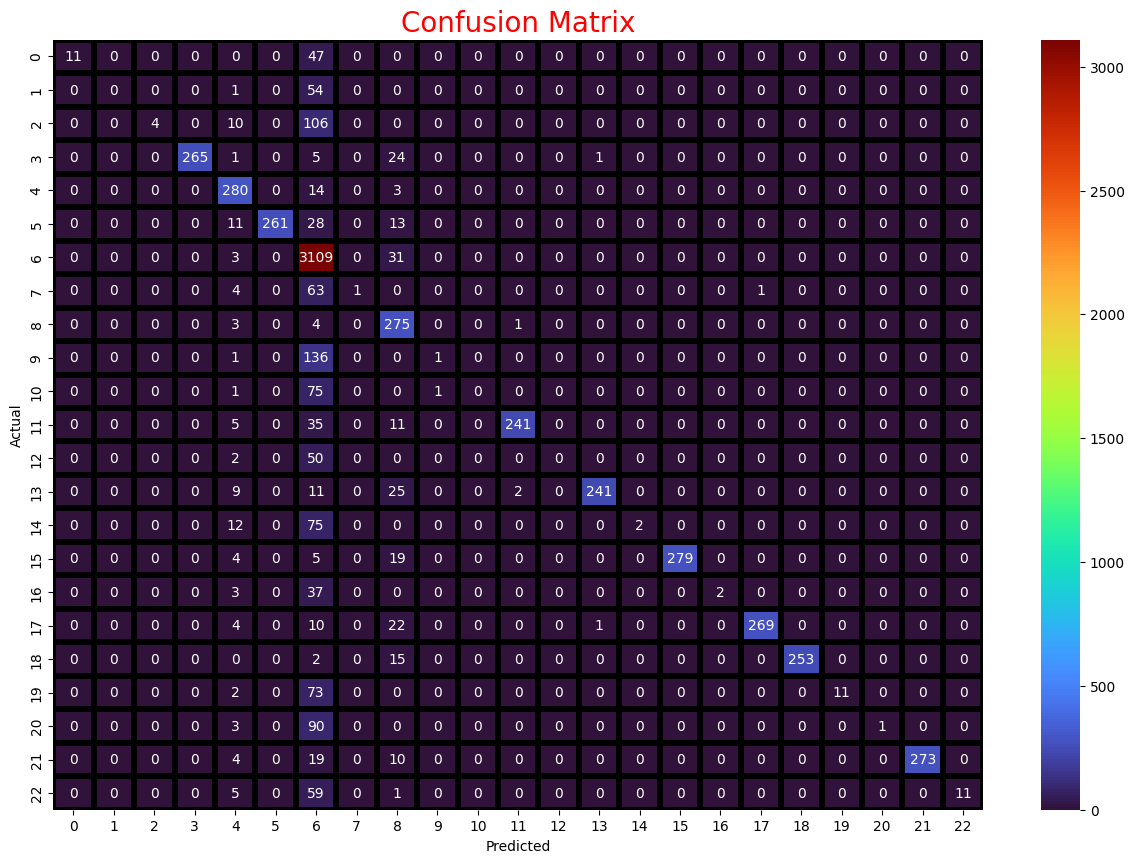

In [37]:
cf2=confusion_matrix(y_test,new_pred)
label_name=enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf2,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="turbo",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
print(classification_report(y_test,new_pred))

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      French       1.00      0.19      0.32        58
      Arabic       0.00      0.00      0.00        55
     Chinese       1.00      0.03      0.06       120
       Dutch       1.00      0.90      0.94       296
     English       0.76      0.94      0.84       297
    Estonian       1.00      0.83      0.91       313
      French       0.76      0.99      0.86      3143
       Hindi       1.00      0.01      0.03        69
  Indonesian       0.61      0.97      0.75       283
    Japanese       0.50      0.01      0.01       138
      Korean       0.00      0.00      0.00        77
       Latin       0.99      0.83      0.90       292
     Persian       0.00      0.00      0.00        52
   Portugese       0.99      0.84      0.91       288
      Pushto       1.00      0.02      0.04        89
    Romanian       1.00      0.91      0.95       307
     Russian       1.00      0.05      0.09        42
     Spanish       1.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# new_model = SVC()
# visualizer = ROCAUC(new_model, classes=label_name)

# visualizer.fit(x_train, y_train)
# visualizer.score(x_test, y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()

# naive Bayes+Countvectorizer

In [40]:
new_nb= MultinomialNB()
new_nb.fit(x_train,y_train)

MultinomialNB()

In [41]:
pred3=nb.predict(x_test)
accuracy1 = accuracy_score(y_test,pred3)
print(f"Accuracy: {accuracy1 * 100:.2f}%")

Accuracy: 86.04%


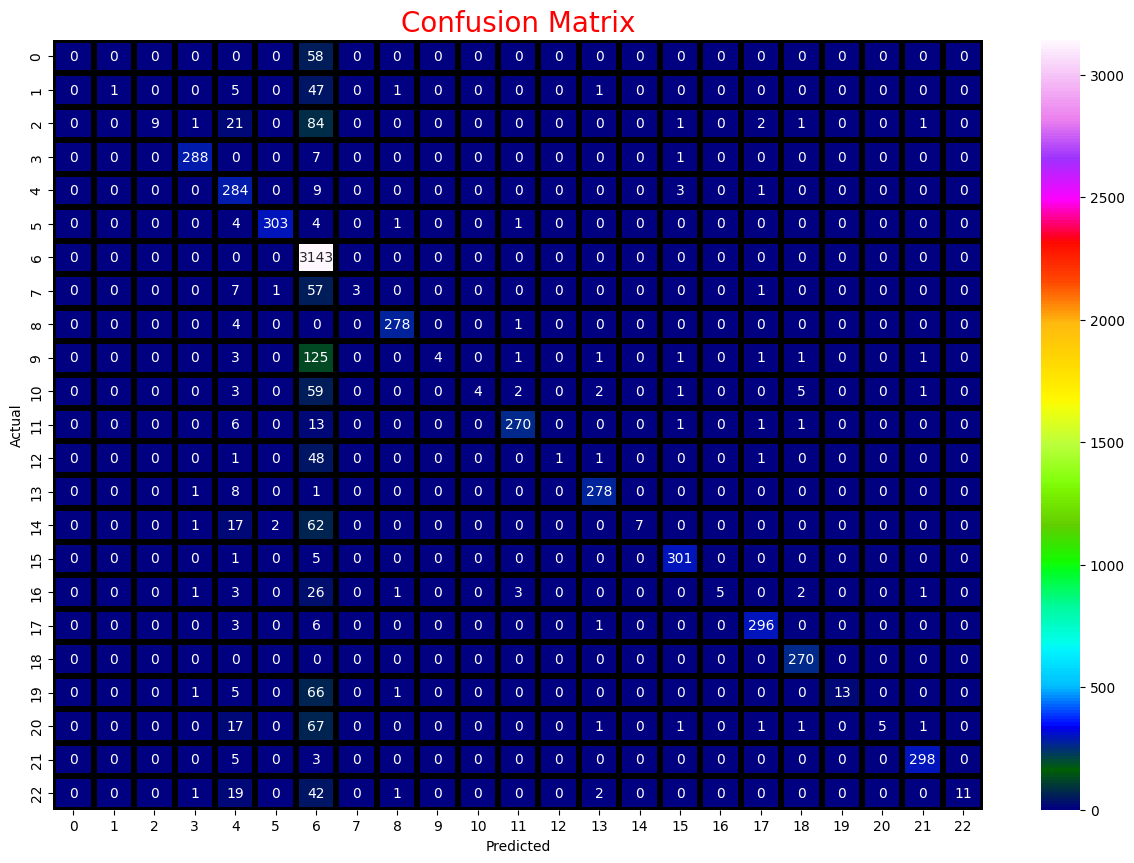

In [42]:
cf4=confusion_matrix(y_test,pred3)
label_name= enccoded_languages
plt.figure(figsize=(15,10))
sns.heatmap(cf4,annot=True,fmt="d",xticklabels=label_name,yticklabels=label_name,cmap="gist_ncar",
           linewidths=3, linecolor='black')
plt.title("Confusion Matrix",fontsize=20,color="red")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
print(classification_report(y_test,pred3))

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      French       0.00      0.00      0.00        58
      Arabic       1.00      0.02      0.04        55
     Chinese       1.00      0.07      0.14       120
       Dutch       0.98      0.97      0.98       296
     English       0.68      0.96      0.80       297
    Estonian       0.99      0.97      0.98       313
      French       0.80      1.00      0.89      3143
       Hindi       1.00      0.04      0.08        69
  Indonesian       0.98      0.98      0.98       283
    Japanese       1.00      0.03      0.06       138
      Korean       1.00      0.05      0.10        77
       Latin       0.97      0.92      0.95       292
     Persian       1.00      0.02      0.04        52
   Portugese       0.97      0.97      0.97       288
      Pushto       1.00      0.08      0.15        89
    Romanian       0.97      0.98      0.98       307
     Russian       1.00      0.12      0.21        42
     Spanish       0.97    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# new_mo = MultinomialNB()
# visualizer = ROCAUC(new_mo, classes=label_name)

# visualizer.fit(x_train, y_train)
# visualizer.score(x_test, y_test)
# plt.figure(figsize=(20, 15))

# visualizer.show()